In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

In [4]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})z

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

        income  type
1330   62000.0  Data
43747  65000.0  Data
1557   50000.0  Data
24204  75000.0  Data
21088  35000.0  Data


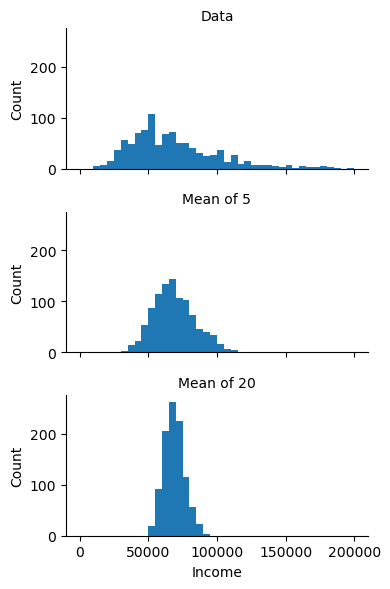

In [5]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [6]:
loans_income.head(5)

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [9]:
type(loans_income)

pandas.core.series.Series

In [10]:
len(loans_income)

50000

In [11]:
sample_data

,income,type
1330,62000,Data
43747,65000,Data
1557,50000,Data
24204,75000,Data
21088,35000,Data
...,...,...
22830,60000,Data
18488,71000,Data
3766,64900,Data
27016,17000,Data


In [12]:
sample_mean_20

,income,type
0,72450.00,Mean of 20
1,66556.25,Mean of 20
2,51121.30,Mean of 20
3,64383.20,Mean of 20
4,57205.55,Mean of 20
...,...,...
995,64656.40,Mean of 20
996,68515.55,Mean of 20
997,65441.40,Mean of 20
998,63835.00,Mean of 20


In [16]:
results = []
for nrepeat in range(1000):
    sample = np.random.choice(loans_income, size = len(loans_income), replace=True)
    results.append(np.median(sample))
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -66.4965000000011
std. error: 211.2810022213318


In [17]:
sample = np.random.choice(loans_income, size = (1000, len(loans_income)), replace=True)
results = np.median(sample, axis = 1)
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -61.15550000000076
std. error: 192.4286773472578


In [20]:
import time

# Your vectorized approach
start = time.time()
sample = np.random.choice(loans_income, size=(1000, len(loans_income)), replace=True)
results = np.median(sample, axis=1)
vectorized_time = time.time() - start

# Loop approach
start = time.time()
results_loop = []
for _ in range(1000):
    sample = np.random.choice(loans_income, size=len(loans_income), replace=True)
    results_loop.append(np.median(sample))
loop_time = time.time() - start


#book
start = time.time()
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
book_time = time.time() - start

print(f"Vectorized: {vectorized_time:.3f}s")
print(f"Loop: {loop_time:.3f}s")
print(f"book koop :{book_time:.3f}s")

Vectorized: 1.689s
Loop: 1.697s
book koop :2.479s
